<a href="https://colab.research.google.com/github/canoztas/CMP656-Advanced-Computer-and-Network-Security-Final-Project/blob/main/compsec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import json
import numpy as np

In [ ]:
DATA_PATH = '/content/drive/MyDrive/dataset/computersecurity/diversevul_20230702.json'

In [ ]:
json_data = []
with open(DATA_PATH, 'r') as file:
    for line in file:
        json_data.append(json.loads(line))

In [ ]:
df = pd.DataFrame(json_data)

In [ ]:
df

,func,target,cwe,project,commit_id,hash,size,message
0,int _gnutls_ciphertext2compressed(gnutls_sessi...,1,[],gnutls,7ad6162573ba79a4392c63b453ad0220ca6c5ace,73008646937836648589283922871188272089,157,added an extra check while checking the padding.
1,static char *make_filename_safe(const char *fi...,1,[CWE-264],php-src,055ecbc62878e86287d742c7246c21606cee8183,211824207069112513181516095447837228041,22,Improve check for :memory: pseudo-filename in ...
2,"unpack_Z_stream(int fd_in, int fd_out)\n{\n\tI...",1,[],busybox,251fc70e9722f931eec23a34030d05ba5f747b0e,21401706257394042943815500829552774160,232,uncompress: fix buffer underrun by corrupted i...
3,"static void cirrus_do_copy(CirrusVGAState *s, ...",1,[CWE-787],qemu,b2eb849d4b1fdb6f35d5c46958c7f703cf64cfef,135590882627853658533498335902319684573,66,"CVE-2007-1320 - Cirrus LGD-54XX ""bitblt"" heap ..."
4,"glue(cirrus_bitblt_rop_fwd_, ROP_NAME)(CirrusV...",1,[CWE-787],qemu,b2eb849d4b1fdb6f35d5c46958c7f703cf64cfef,27696392987383562433164405181263025184,18,"CVE-2007-1320 - Cirrus LGD-54XX ""bitblt"" heap ..."
...,...,...,...,...,...,...,...,...
330487,CpuDefinitionInfoList *qmp_query_cpu_definitio...,0,[],qemu,3517fb726741c109cae7995f9ea46f0cab6187d6,56328616090786580903442755377663895929,11,target/loongarch: Clean up tlb when cpu reset\...
330488,static bool loongarch_cpu_exec_interrupt(CPUSt...,0,[],qemu,3517fb726741c109cae7995f9ea46f0cab6187d6,308599394633213124954476819219638447801,16,target/loongarch: Clean up tlb when cpu reset\...
330489,static bool loongarch_cpu_has_work(CPUState *c...,0,[],qemu,3517fb726741c109cae7995f9ea46f0cab6187d6,301843980364088488473686042246891987712,17,target/loongarch: Clean up tlb when cpu reset\...
330490,static void loongarch_cpu_add_definition(gpoin...,0,[],qemu,3517fb726741c109cae7995f9ea46f0cab6187d6,219820574007661143707936206230801064371,13,target/loongarch: Clean up tlb when cpu reset\...


In [ ]:
df['target'].value_counts()

0    311547
1     18945
Name: target, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

<Axes: xlabel='target', ylabel='count'>

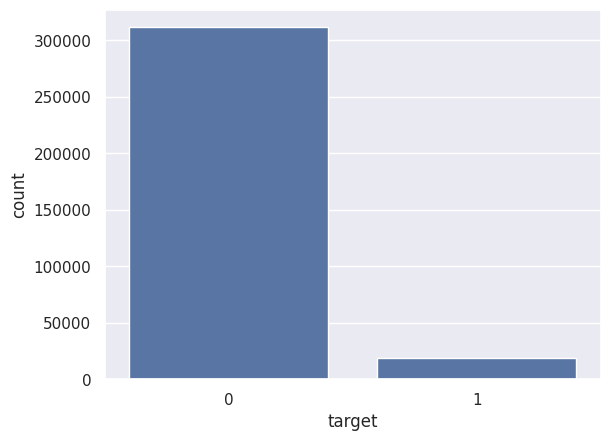

In [ ]:
%matplotlib inline
sns.countplot(df,x='target')

<Axes: ylabel='target'>

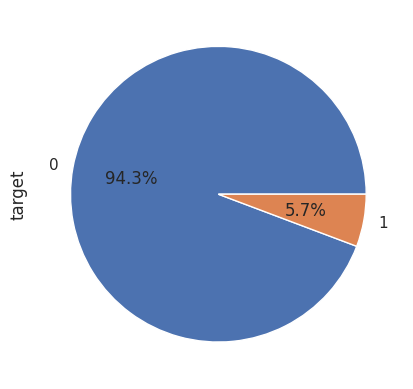

In [ ]:
df['target'].value_counts().head(10).plot.pie(autopct='%1.1f%%')

In [ ]:
def wl(text):
    return len(text.split(" "))
df['word_length']=df['func'].apply(wl)

In [ ]:
df['word_length']

0         584
1          33
2         621
3         395
4         211
         ... 
330487     37
330488    130
330489     67
330490     83
330491     72
Name: word_length, Length: 330492, dtype: int64

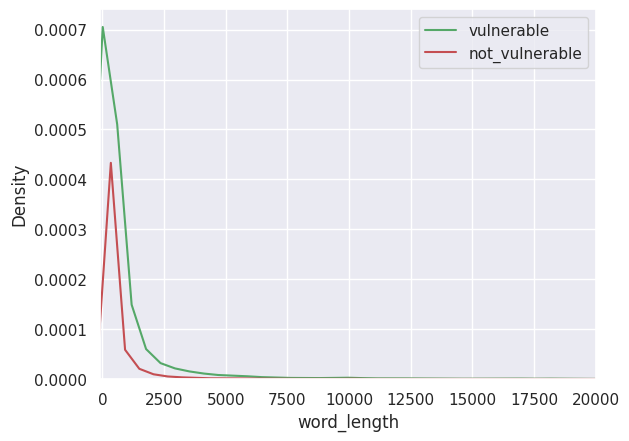

In [ ]:
sns.kdeplot(df[df['target']==1]['word_length'],color='g')
sns.kdeplot(df[df['target']==0]['word_length'],color='r')
plt.xlim([-100,20000])
plt.legend(['vulnerable','not_vulnerable'])

<Axes: xlabel='target', ylabel='word_length'>

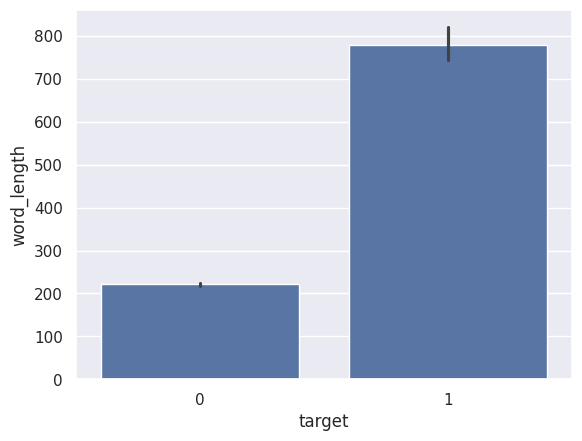

In [ ]:
sns.barplot(x='target',y='word_length',data=df)

In [ ]:
df['char_length']=df['func'].apply(len)

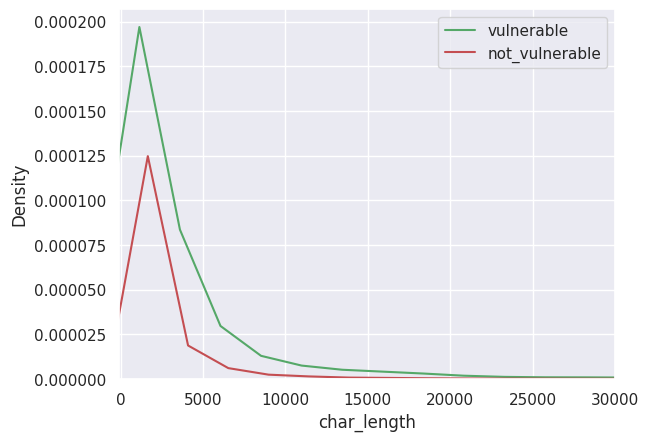

In [ ]:
sns.kdeplot(df[df['target']==1]['char_length'],color='g')
sns.kdeplot(df[df['target']==0]['char_length'],color='r')
plt.xlim([-100,30000])
plt.legend(['vulnerable','not_vulnerable'])

<Axes: xlabel='target', ylabel='char_length'>

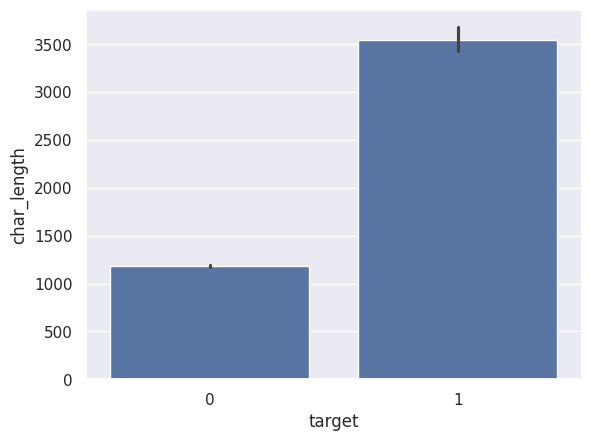

In [ ]:
sns.barplot(x='target',y='char_length',data=df)

<Axes: xlabel='char_length', ylabel='word_length'>

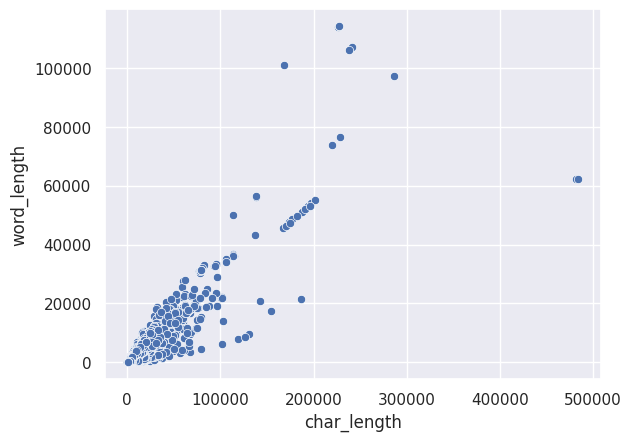

In [ ]:
sns.scatterplot(x='char_length',y='word_length',data=df)

((array([-4.6014979 , -4.41327659, -4.31125094, ...,  4.31125094,
          4.41327659,  4.6014979 ]),
  array([     0,      1,      5, ..., 286412, 482198, 484356])),
 (1858.3362171101717, 1313.8597605993489, 0.4736446243036679))

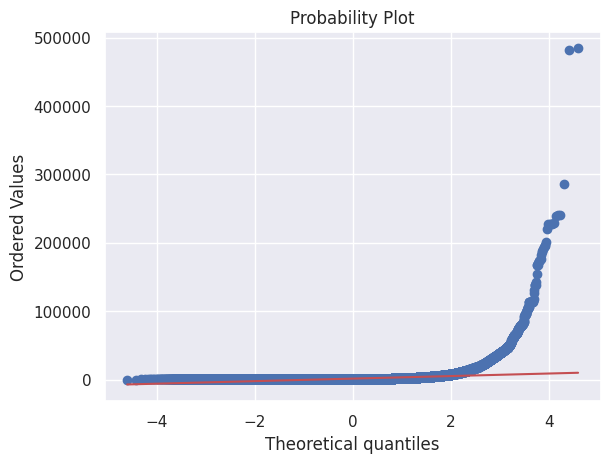

In [ ]:
from scipy import stats
import statsmodels.api as sm
stats.probplot(df['char_length'], plot=plt)

((array([-4.6014979 , -4.41327659, -4.31125094, ...,  4.31125094,
          4.41327659,  4.6014979 ]),
  array([     1,      1,      1, ..., 114223, 114223, 114268])),
 (439.4343449309056, 253.27035147598127, 0.37828943425873635))

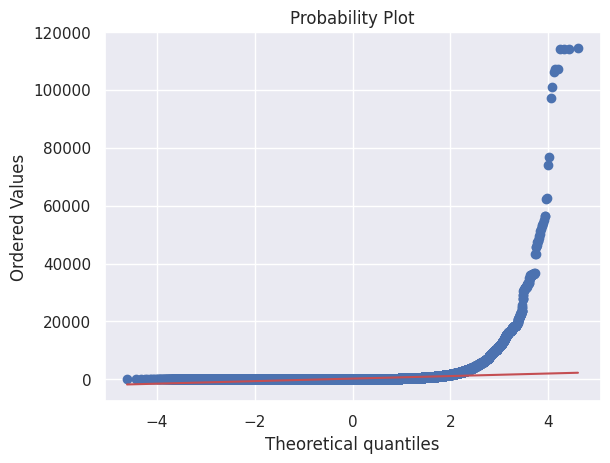

In [ ]:
stats.probplot(df['word_length'], plot=plt)

In [ ]:
df['unique_word_count'] =df['func'].apply(lambda x: len(set(str(x).split())))

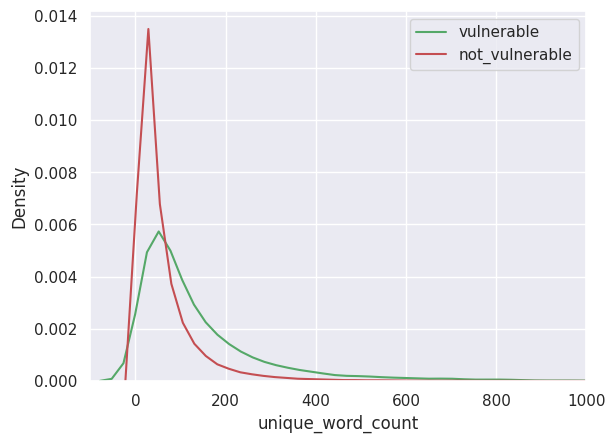

In [ ]:
sns.kdeplot(df[df['target']==1]['unique_word_count'],color='g')
sns.kdeplot(df[df['target']==0]['unique_word_count'],color='r')
plt.xlim([-100,1000])
plt.legend(['vulnerable','not_vulnerable'])

<Axes: xlabel='unique_word_count', ylabel='word_length'>

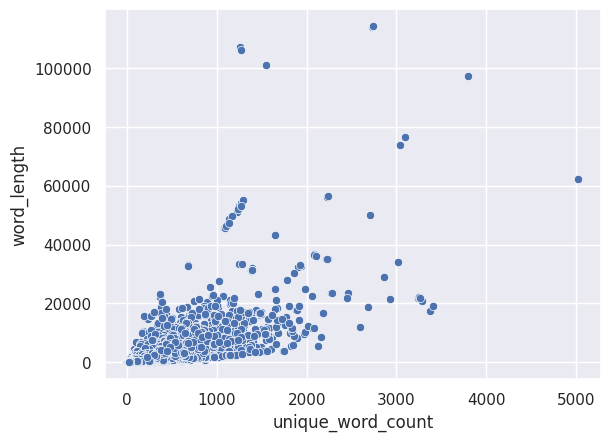

In [ ]:
sns.scatterplot(x='unique_word_count',y='word_length',data=df)

<Axes: xlabel='char_length', ylabel='unique_word_count'>

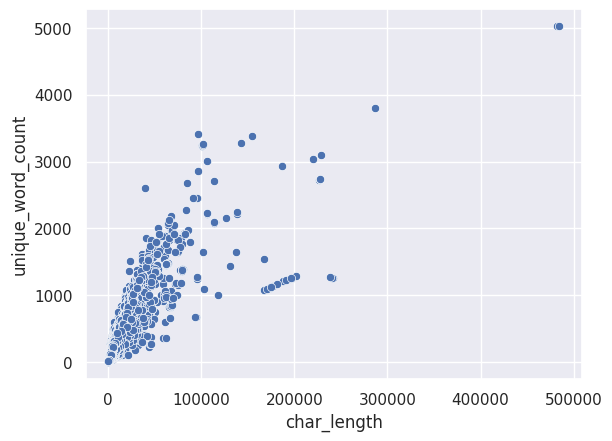

In [ ]:
sns.scatterplot(x='char_length',y='unique_word_count',data=df)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['stop_words']=df['func'].apply(lambda x: len([words for words in str(x).lower().split() if words in all_stopwords]))

<Axes: xlabel='target', ylabel='stop_words'>

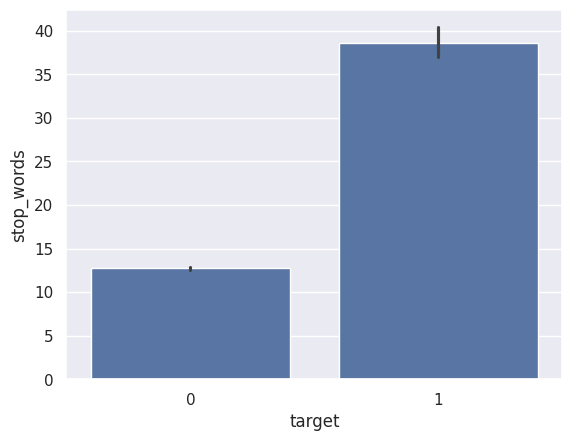

In [ ]:
sns.barplot(x='target',y='stop_words',data=df)

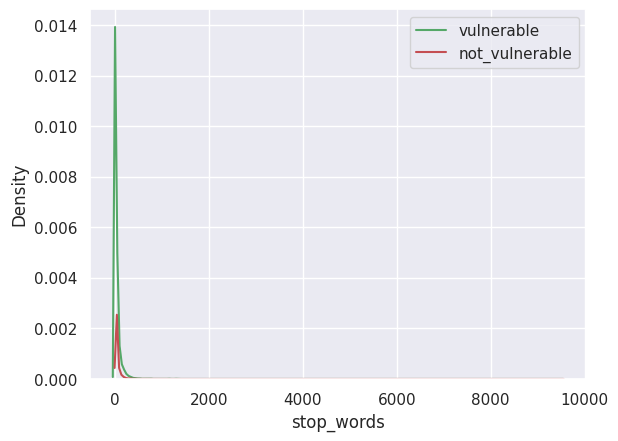

In [ ]:
sns.kdeplot(df[df['target']==1]['stop_words'],color='g')
sns.kdeplot(df[df['target']==0]['stop_words'],color='r')
plt.legend(['vulnerable','not_vulnerable'])

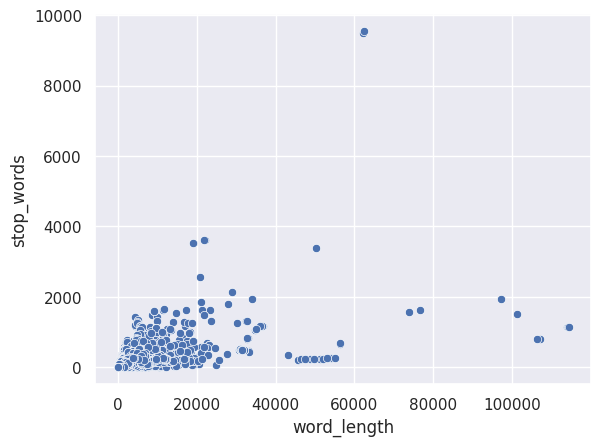

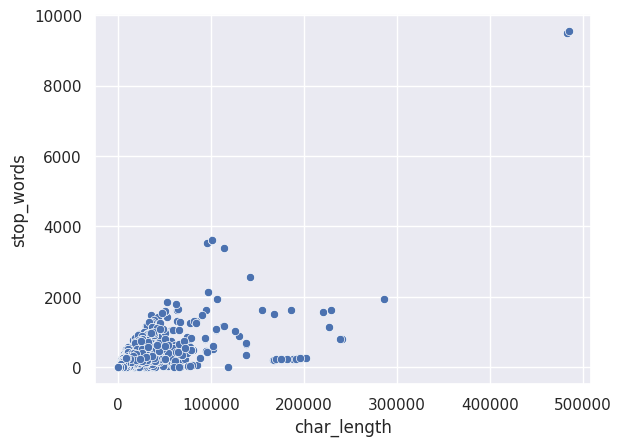

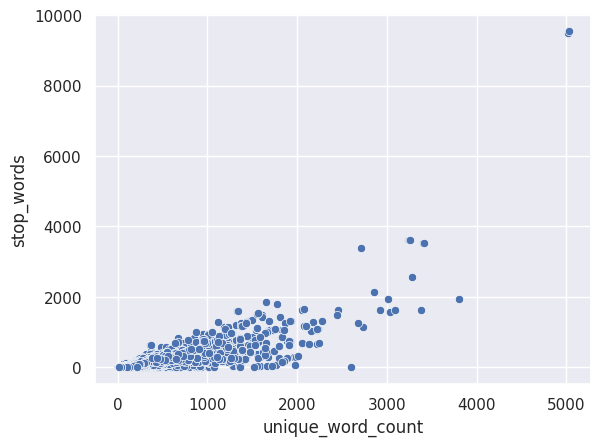

In [ ]:
features=['word_length','char_length','unique_word_count']
for i in features:
    sns.scatterplot(x=i,y='stop_words',data=df)
    plt.show()

<ipython-input-56-cc38db204694>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

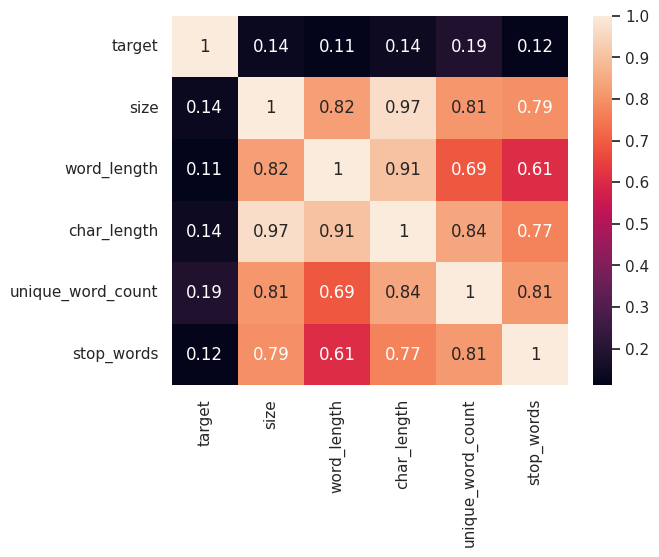

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True)

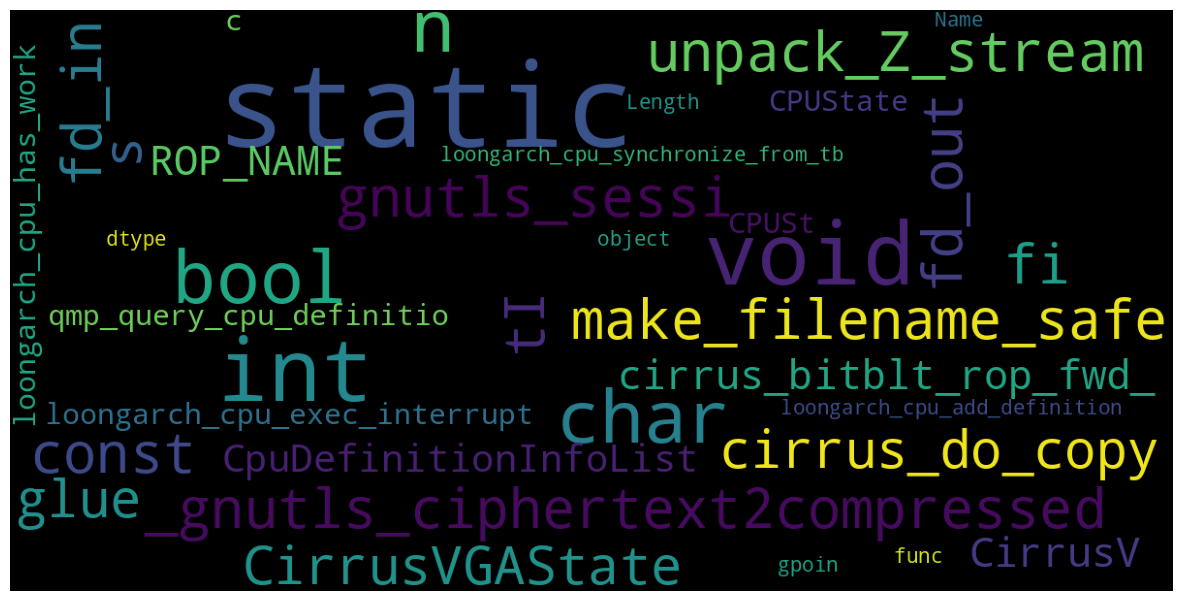

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['func'])

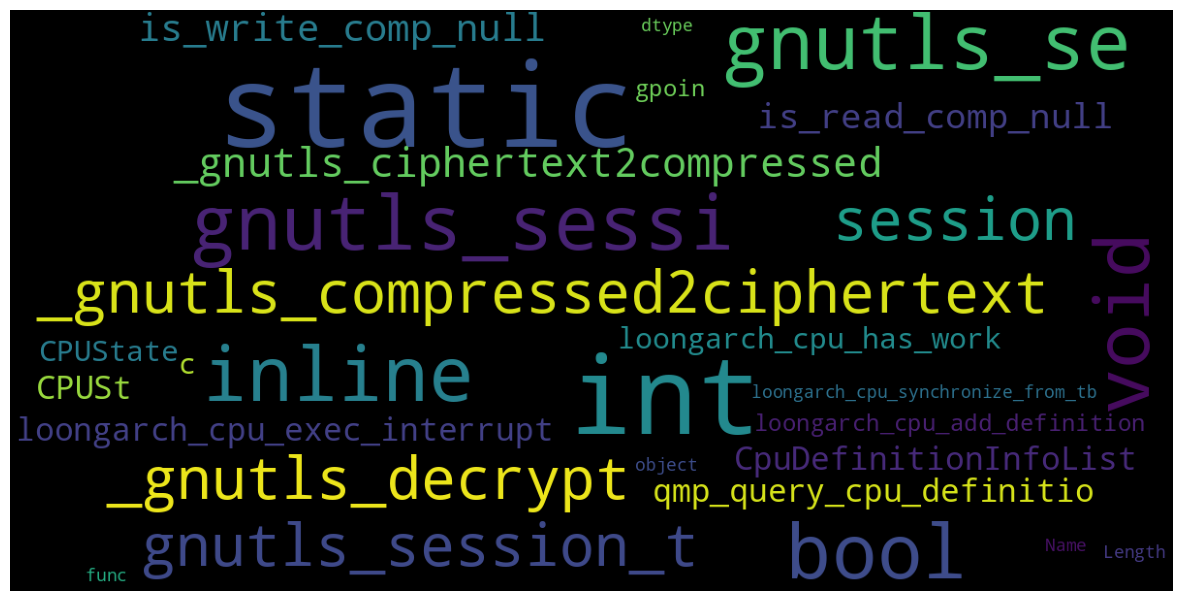

In [ ]:
show_wordcloud(df[df['target']==0]['func'])

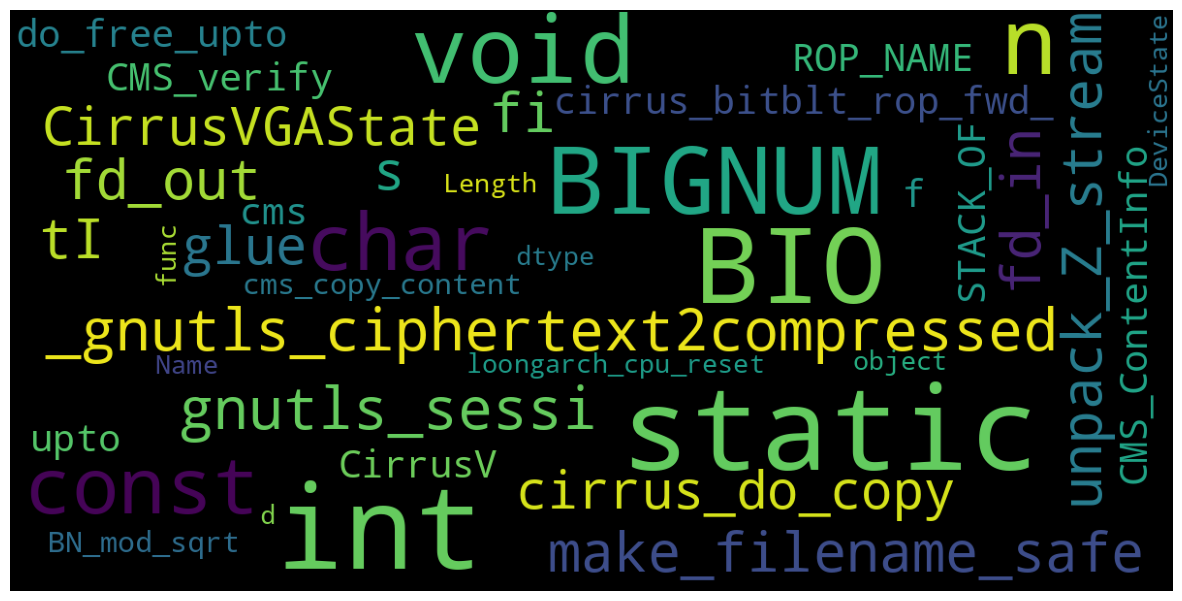

In [ ]:
show_wordcloud(df[df['target']==1]['func'])

In [ ]:
df = df.sample(n=len(df)//20)

In [ ]:
df = df[df['target']==1] #for second analysis

In [ ]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

all_text=df['func']
train_text=df['func']
y=df['cwe']

In [ ]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)

In [ ]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)

train_features = hstack([train_char_features, train_word_features])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3,random_state=101)

In [ ]:
y_train = y_train.astype(str)
y_test = y_test.astype(str)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
preds=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
import xgboost as xgb

In [ ]:
xgb=xgb.XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
preds2=xgb.predict(X_test)

In [ ]:
xgb_accuracy=accuracy_score(preds2,y_test)

In [ ]:
rf_accuracy=accuracy_score(preds,y_test)

In [ ]:
print("Random Forest Model accuracy",rf_accuracy)

Random Forest Model accuracy 0.46921182266009853


In [ ]:
print("XGBoost Model accuracy",xgb_accuracy)

Deep Learning

In [ ]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_y, test_y = train_test_split(df['func'],df['target'],test_size = 0.2)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam

In [ ]:
MAX_NB_WORDS = 20000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/text.py:246: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn(


Found 299627 unique tokens.


In [ ]:
MAX_SEQUENCE_LENGTH = 200
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (264393, 200)
Shape of data test tensor: (66099, 200)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, train_y,
          batch_size=128,
          epochs=10,
          validation_data=(x_test, test_y))

Epoch 1/10
2066/2066 [==============================] - 1024s 493ms/step - loss: 0.2007 - accuracy: 0.9424 - val_loss: 0.1934 - val_accuracy: 0.9426
Epoch 2/10
2066/2066 [==============================] - 1011s 489ms/step - loss: 0.1762 - accuracy: 0.9429 - val_loss: 0.1873 - val_accuracy: 0.9430
Epoch 3/10
2066/2066 [==============================] - 1013s 490ms/step - loss: 0.1615 - accuracy: 0.9435 - val_loss: 0.1948 - val_accuracy: 0.9385
Epoch 4/10
2066/2066 [==============================] - 1015s 491ms/step - loss: 0.1496 - accuracy: 0.9440 - val_loss: 0.1967 - val_accuracy: 0.9403
Epoch 5/10
2066/2066 [==============================] - 1017s 492ms/step - loss: 0.1385 - accuracy: 0.9451 - val_loss: 0.2100 - val_accuracy: 0.9381
Epoch 6/10
2066/2066 [==============================] - 1020s 494ms/step - loss: 0.1288 - accuracy: 0.9460 - val_loss: 0.2197 - val_accuracy: 0.9361
Epoch 7/10
2066/2066 [==============================] - 1021s 494ms/step - loss: 0.1196 - accuracy: 0.9471

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm = confusion_matrix(y_test, preds2)

xgb_Recall = recall_score(y_test, preds2)
xgb_Precision = precision_score(y_test, preds2)
xgb_f1 = f1_score(y_test, preds2)
xgb_accuracy = accuracy_score(y_test, preds2)

print(cm)

[[93118   412]
 [ 5272   346]]


In [ ]:
ndf = [(xgb_Recall, xgb_Precision, xgb_f1, xgb_accuracy)]

xgb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
xgb_score.insert(0, 'XGB with', 'No Under/Oversampling')
xgb_score

,XGB with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.061588,0.456464,0.108532,0.942672


In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm = confusion_matrix(y_test, preds)

rf_Recall = recall_score(y_test, preds)
rf_Precision = precision_score(y_test, preds)
rf_f1 = f1_score(y_test, preds)
rf_accuracy = accuracy_score(y_test, preds)

print(cm)

In [ ]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.112674,0.226152,0.15041,0.927875
